In [162]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load data

In [7]:
df1 = pd.read_csv('clean1.csv',index_col='Id')
df2 = pd.read_csv('clean2.csv',index_col='Id')
df3 = pd.read_csv('clean3.csv',index_col='Id')

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 24877594 to 19146917
Data columns (total 10 columns):
Unnamed: 0     100000 non-null int64
abstract       96242 non-null object
title          99942 non-null object
authors        99943 non-null object
journal        100000 non-null object
journal_abv    100000 non-null object
date           99831 non-null object
affiliation    99946 non-null object
records        99722 non-null object
keywords       28959 non-null object
dtypes: int64(1), object(9)
memory usage: 8.4+ MB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 19144669 to 16708398
Data columns (total 10 columns):
Unnamed: 0     100000 non-null int64
abstract       94422 non-null object
title          99979 non-null object
authors        99979 non-null object
journal        100000 non-null object
journal_abv    100000 non-null object
date           99995 non-null object
affiliation    99979 non-null object
records        99976 non-null object
keywords       8924 non-null object
dtypes: int64(1), object(9)
memory usage: 8.4+ MB


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124059 entries, 16707122 to 1281707
Data columns (total 10 columns):
Unnamed: 0     124059 non-null int64
abstract       106118 non-null object
title          123949 non-null object
authors        123949 non-null object
journal        124059 non-null object
journal_abv    124059 non-null object
date           123949 non-null object
affiliation    123997 non-null object
records        123949 non-null object
keywords       0 non-null float64
dtypes: float64(1), int64(1), object(8)
memory usage: 10.4+ MB


In [3]:
df1.head()

,Unnamed: 0,Id,abstract,title,authors,journal,journal_abv,date,affiliation,records,keywords
0,0,24877594,Abstract It has been well appreciated tha...,What we know and do not know about the cannab...,"['Malfitano AM', 'Basu S', 'Maresz K', 'Bifulc...",Seminars in immunology.,Semin Immunol,2014 Oct;26(5):369-79.,"\n Dipartimento di Medicina e Chirurgia, Unive...","<div class=""cit"">\n <a abstractlink=""yes"" alse...",KEYWORDS: Cannabinoid receptor 2; Endocann...
1,1,16889837,Abstract Approximately 1% of the genome o...,Allosteric agonists of 7TM receptors: expandi...,"['Langmead CJ', 'Christopoulos A']",Trends in pharmacological sciences.,Trends Pharmacol Sci,2006 Sep;27(9):475-81. Epub 2006 Aug 4.,\n Psychiatry Centre of Excellence for Drug Di...,"<div class=""cit"">\n <a abstractlink=""yes"" alse...",NaN
2,2,31068464,Abstract Patients suffering from cholesta...,MRGPRX4 is a G protein-coupled receptor activ...,"['Meixiong J', 'Vasavda C', 'Snyder SH', 'Dong...",Proceedings of the National Academy of Science...,Proc Natl Acad Sci U S A,2019 May 21;116(21):10525-10530.,\n Solomon H. Snyder Department of Neuroscienc...,"<div class=""cit"">\n <a abstractlink=""yes"" alse...",KEYWORDS: MRGPRX4; bile acids; cholestasis...
3,3,30610192,Abstract Alcohol use disorder (AUD) is a ...,"Modulation of Gpr39, a G-protein coupled rece...","['Cuzon Carlson VC', 'Ford MM', 'Carlson TL', ...",Neuropsychopharmacology : official publication...,Neuropsychopharmacology,2019 May;44(6):1103-1113.,"\n Division of Neuroscience, Oregon National P...","<div class=""cit"">\n <a abstractlink=""yes"" alse...",NaN
4,4,30289386,Abstract Activation of heterotrimeric G p...,Simulation of spontaneous G protein activatio...,"['Sun X', 'Singh S', 'Blumer KJ', 'Bowman GR']",eLife.,Elife,2018 Oct 5;7. pii: e38465.,\n Department of Biochemistry and Molecular Bi...,"<div class=""cit"">\n <a abstractlink=""yes"" alse...",KEYWORDS: G proteins; Markov state models;...


# Extract abstract + title, year, keyword,affiliation

In [134]:
df = pd.concat([df1[['abstract','title','date','affiliation','keywords']],
               df2[['abstract','title','date','affiliation','keywords']],
                df3[['abstract','title','date','affiliation','keywords']]])

In [144]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324059 entries, 24877594 to 1281707
Data columns (total 5 columns):
abstract       296782 non-null object
title          323870 non-null object
date           323775 non-null object
affiliation    323922 non-null object
keywords       37883 non-null object
dtypes: object(5)
memory usage: 14.8+ MB


((324059, 5), None)

In [143]:
# drop columns with no title information
dfs = df.dropna(subset=['title'])
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323870 entries, 24877594 to 1281707
Data columns (total 5 columns):
abstract       296781 non-null object
title          323870 non-null object
date           323703 non-null object
affiliation    323870 non-null object
keywords       37845 non-null object
dtypes: object(5)
memory usage: 14.8+ MB


In [163]:
# fill na with empty str and concat title with abstract to text column
dfs['text'] = dfs.title
dfs = dfs.fillna('')
dfs.text = dfs.text + dfs.abstract

In [238]:
# extract year
def extract_year(text):
    if len(text) > 3:
        dates = text.split(';')
        for x in dates[0].split():
            try:
                year = str(int(x))
                return year
            except:
                continue

In [240]:
dfs['year'] = dfs.date.apply(extract_year)

In [222]:
year = dfs.year.value_counts(ascending = True).sort_index()

(1945, 2018)

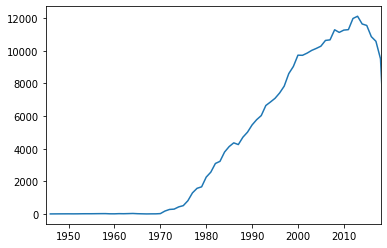

In [228]:
plt.plot(year.index,year)
plt.xlim(1945,2018)

In [226]:
year.index

Float64Index([1946.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0,
              1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0,
              1963.0, 1964.0, 1965.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0,
              1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0,
              1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0,
              1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0,
              1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0,
              2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0,
              2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0],
             dtype='float64')

In [241]:
dfs.head()

,abstract,title,date,affiliation,keywords,text,year
Id,,,,,,,
24877594,Abstract It has been well appreciated tha...,What we know and do not know about the cannab...,2014 Oct;26(5):369-79.,"\n Dipartimento di Medicina e Chirurgia, Unive...",KEYWORDS: Cannabinoid receptor 2; Endocann...,What we know and do not know about the cannab...,2014
16889837,Abstract Approximately 1% of the genome o...,Allosteric agonists of 7TM receptors: expandi...,2006 Sep;27(9):475-81. Epub 2006 Aug 4.,\n Psychiatry Centre of Excellence for Drug Di...,,Allosteric agonists of 7TM receptors: expandi...,2006
31068464,Abstract Patients suffering from cholesta...,MRGPRX4 is a G protein-coupled receptor activ...,2019 May 21;116(21):10525-10530.,\n Solomon H. Snyder Department of Neuroscienc...,KEYWORDS: MRGPRX4; bile acids; cholestasis...,MRGPRX4 is a G protein-coupled receptor activ...,2019
30610192,Abstract Alcohol use disorder (AUD) is a ...,"Modulation of Gpr39, a G-protein coupled rece...",2019 May;44(6):1103-1113.,"\n Division of Neuroscience, Oregon National P...",,"Modulation of Gpr39, a G-protein coupled rece...",2019
30289386,Abstract Activation of heterotrimeric G p...,Simulation of spontaneous G protein activatio...,2018 Oct 5;7. pii: e38465.,\n Department of Biochemistry and Molecular Bi...,KEYWORDS: G proteins; Markov state models;...,Simulation of spontaneous G protein activatio...,2018


# Keyword distribtuion

In [378]:
dfc = dfs[['keywords','year']].dropna(subset=['keywords'])
dfc.shape

(323870, 2)

In [379]:
# get keywords list
def extract_keywords(x):
    
    if len(x) > 5: #not na
        text = x.split(':')[1].split(';')
        text_list = [' '.join(x.split()) for x in text]
        result = [x.lower() for x in text_list]
        return result
dfc.keywords = dfc.keywords.apply(extract_keywords)


In [417]:
dfs.keywords = dfc.keywords
dfs.head()

,abstract,title,date,affiliation,keywords,text,year
Id,,,,,,,
24877594,Abstract It has been well appreciated tha...,What we know and do not know about the cannab...,2014 Oct;26(5):369-79.,"\n Dipartimento di Medicina e Chirurgia, Unive...","[cannabinoid receptor 2, endocannabinoid, immu...",What we know and do not know about the cannab...,2014
16889837,Abstract Approximately 1% of the genome o...,Allosteric agonists of 7TM receptors: expandi...,2006 Sep;27(9):475-81. Epub 2006 Aug 4.,\n Psychiatry Centre of Excellence for Drug Di...,None,Allosteric agonists of 7TM receptors: expandi...,2006
31068464,Abstract Patients suffering from cholesta...,MRGPRX4 is a G protein-coupled receptor activ...,2019 May 21;116(21):10525-10530.,\n Solomon H. Snyder Department of Neuroscienc...,"[mrgprx4, bile acids, cholestasis, itch, pruri...",MRGPRX4 is a G protein-coupled receptor activ...,2019
30610192,Abstract Alcohol use disorder (AUD) is a ...,"Modulation of Gpr39, a G-protein coupled rece...",2019 May;44(6):1103-1113.,"\n Division of Neuroscience, Oregon National P...",None,"Modulation of Gpr39, a G-protein coupled rece...",2019
30289386,Abstract Activation of heterotrimeric G p...,Simulation of spontaneous G protein activatio...,2018 Oct 5;7. pii: e38465.,\n Department of Biochemistry and Molecular Bi...,"[g proteins, markov state models, allostery, c...",Simulation of spontaneous G protein activatio...,2018


In [380]:
dfc.keywords.head()

Id
24877594    [cannabinoid receptor 2, endocannabinoid, immu...
16889837                                                 None
31068464    [mrgprx4, bile acids, cholestasis, itch, pruri...
30610192                                                 None
30289386    [g proteins, markov state models, allostery, c...
Name: keywords, dtype: object

In [390]:
keywords = dfc.keywords.dropna()

In [391]:
# flatten list
keywords_list = []
for i in range(keywords.shape[0]):
    if type(keywords.iloc[i]) == list:
        keywords_list += keywords.iloc[i]

In [392]:
from collections import Counter

In [402]:
# get word counts
c = Counter(keywords_list)

In [403]:
# sort dictionary by value
import operator
sorted_c = sorted(c.items(), key=operator.itemgetter(1))

In [404]:
x = [i[0] for i in sorted_c] # keyword list
y = [i[1] for i in sorted_c] # keyword counts

In [405]:
len(x),len(y),len(sorted_c) # total keywords

(68113, 68113, 68113)

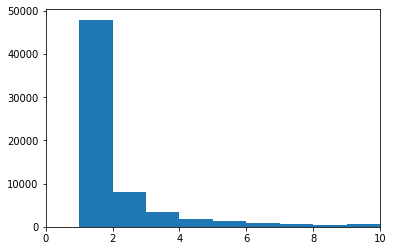

In [406]:
# keyword count distribution
plt.hist(y,bins=[1,2,3,4,5,6,7,8,9,10])
plt.xlim(0,10)
plt.show()

In [407]:
print(x[-20:]) # top 20 keywords

['cancer', 'signal transduction', 'pain', 'microglia', 'rat', 'g protein-coupled receptor (gpcr)', 'hypertension', 'schizophrenia', 'anxiety', 'diabetes', 'depression', 'hippocampus', 'apoptosis', 'cxcr4', 'obesity', 'serotonin', 'g protein-coupled receptor', 'dopamine', 'gpcr', 'inflammation']


In [408]:
dfy = dfc.dropna(subset=['keywords'])

In [409]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37845 entries, 24877594 to 18167517
Data columns (total 2 columns):
keywords    37845 non-null object
year        37845 non-null object
dtypes: object(2)
memory usage: 887.0+ KB


In [410]:
def keyword_year(word,data):
    year = []
    for i in range(data.shape[0]):
        if word in data.keywords.iloc[i]:
            year.append(data.year.iloc[i])
    return year


In [411]:
def plot_keyword(data,*keywords):
    temp = []
    for word in keywords:
        temp += keyword_year(word,data)
    keyword_count = Counter(temp)
    sorted_count = sorted(keyword_count.items(), key=operator.itemgetter(1))
    x = [sorted_count[i][0] for i in range(len(sorted_count))]
    y = [sorted_count[i][1] for i in range(len(sorted_count))]
    plt.plot(x,y)
    title = 'study trends for: ' + word
    plt.title(title)

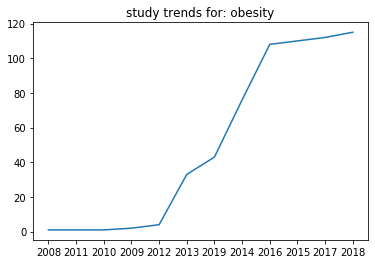

In [412]:
plot_keyword(dfy,'obesity')

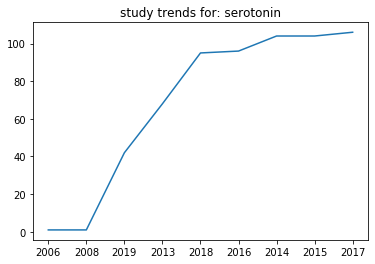

In [413]:
plot_keyword(dfy,'serotonin')

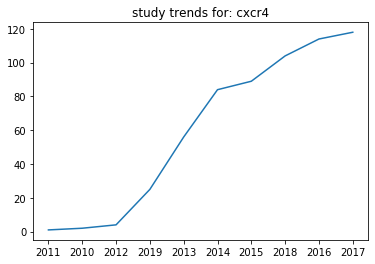

In [414]:
plot_keyword(dfy,'cxcr4')

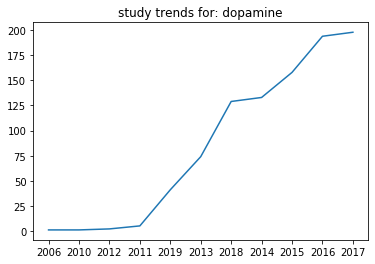

In [415]:
plot_keyword(dfy,'dopamine')

In [416]:
dfy.year.min(),dfy.year.max()

('1998', '2019')

# Clean affiliation

In [419]:
dfs.affiliation.iloc[0]

'\n Dipartimento di Medicina e Chirurgia, Università di Salerno Facoltà di Medicina, Baronissi Campus, Baronissi 84081, (SA), Italy; Dipartimento di Farmacia, Università di Salerno, Fisciano 84084, (SA), Italy.\n<'

In [420]:
dfs.affiliation.iloc[1]

'\n Psychiatry Centre of Excellence for Drug Discovery, GlaxoSmithKline, Third Avenue, Harlow, Essex CM19 5AW, UK. christopher.j.langmead@gsk.com\n'

In [421]:
dfs.affiliation.iloc[2]

'\n Solomon H. Snyder Department of Neuroscience, The Johns Hopkins University School of Medicine, Baltimore, MD 21205.\n<'

In [422]:
dfs.affiliation.iloc[3]

'\n Division of Neuroscience, Oregon National Primate Research Center, Oregon Health and Sciences University, Beaverton, Oregon, USA.\n<'

In [424]:
dfs[['year','text','keywords']].to_csv('clean_year_text_keywords.csv')